# Bag of Words Meets Bags of Popcorn

# 1) Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2) Loading data

In [4]:
train_data = pd.read_csv('labeledTrainData.tsv', sep='\t')

In [5]:
train_data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
train_data.shape

(25000, 3)

In [7]:
train_data.iloc[0].review

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [8]:
train_data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [9]:
test_data = pd.read_csv('testData.tsv', sep='\t')

In [10]:
test_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


# 3) Getting to know data

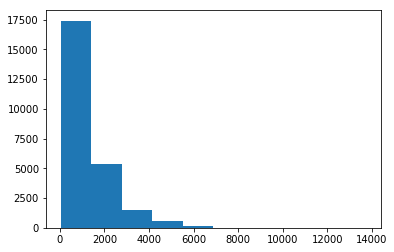

In [11]:
# Review length
train_data['review_length'] = train_data.review.apply(len)

p = plt.hist(train_data.review_length.values)

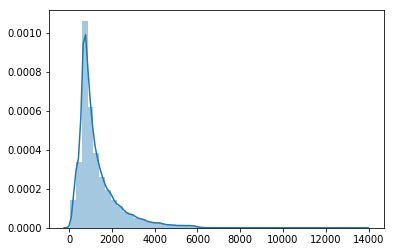

In [12]:
p = sns.distplot(train_data.review_length.values)

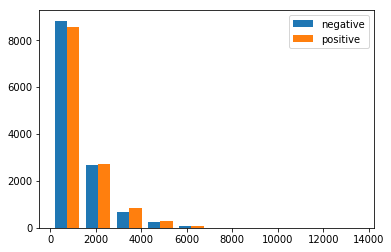

In [13]:
p = plt.hist([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], label=['negative', 'positive'])
plt.legend()

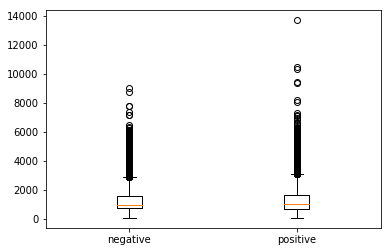

In [14]:
bp = plt.boxplot([train_data[train_data.sentiment==0].review_length.values, 
              train_data[train_data.sentiment==1].review_length.values], labels=['negative', 'positive'])

In [15]:
# Negative reviews
train_data[train_data.sentiment==0].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,0.0,1305.721920
std,0.0,959.142634
min,0.0,52.000000
25%,0.0,711.000000
50%,0.0,978.000000
75%,0.0,1569.250000
max,0.0,8999.000000


In [16]:
# Positive reviews
train_data[train_data.sentiment==1].describe()

,sentiment,review_length
count,12500.0,12500.000000
mean,1.0,1349.699200
std,0.0,1048.890394
min,1.0,70.000000
25%,1.0,695.000000
50%,1.0,984.000000
75%,1.0,1653.000000
max,1.0,13708.000000


In [17]:
# check a specific review 
train_data[train_data.review_length==52].review.all()

'This movie is terrible but it has some good effects.'

In [18]:
train_data[train_data.review_length==1308].review.all()

"If I'm going to watch a porn movie, I prefer it to have some sort of plot, and a descent dialogue. Behind Bedroom Doors is one of the few I've come across with those attributes.<br /><br />The new girl next door scams on the neighbor's human nature and weaknesses where seduction and sex concerned. Chelsea Blue,(I mean Brooke LaVelle) is the choice actress to play the part of the blackmailing seductress, and plays the part magnificently. Chelsea Blue is a very talented and extremely beautiful actress. The movie get's an overall 10 just because she is in it. Her partner in the movie, Monique Alexander is a definite cutie. The two should do more work together. In this movie, though, Monique, who plays Gigi, doesn't have a whole lot to do or say. That's too bad. She seems like she has more talent to be shared. I like the girl who was the (possible) DA's wife next. I forget her name, but she's pretty good looking, and not a bad actress. Nicole Sheridan...I'm still trying to figure out what

# 4) Word extractions

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
vocab = ['awesome', 'terrible']

In [21]:
simple_vectorizer = CountVectorizer(vocabulary=vocab)
bow = simple_vectorizer.fit_transform(train_data.review).todense()

In [22]:
bow

matrix([[0, 0],
        [0, 0],
        [0, 0],
        ...,
        [0, 0],
        [0, 0],
        [0, 0]], dtype=int64)

In [23]:
words = list(simple_vectorizer.vocabulary_.keys())

In [24]:
words

['awesome', 'terrible']

In [25]:
# Convert bow to DataFrame
bow_df = pd.DataFrame(bow, index=train_data.index, columns = words)

In [26]:
# How many have neither word?
bow_df[(bow_df.awesome==0) & (bow_df.terrible==0)].count()

awesome     23276
terrible    23276
dtype: int64

In [27]:
# Join with training data
df = train_data.join(bow_df)

In [28]:
df[(df.sentiment==1) & (df.terrible>0)].count()

id               217
sentiment        217
review           217
review_length    217
awesome          217
terrible         217
dtype: int64

In [29]:
df[(df.sentiment==0) & (df.awesome>0)].count()

id               111
sentiment        111
review           111
review_length    111
awesome          111
terrible         111
dtype: int64

### Expand vocabulary

In [30]:
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful','boring']

In [31]:
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(train_data.review).todense()

In [32]:
bow_expand

matrix([[0, 0, 0, ..., 3, 0, 1],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
# Convert bow to DataFrame
bow_expand_df = pd.DataFrame(bow_expand, index=train_data.index, columns = vocab_expand)

In [34]:
s = bow_expand_df.apply(sum, axis=1)

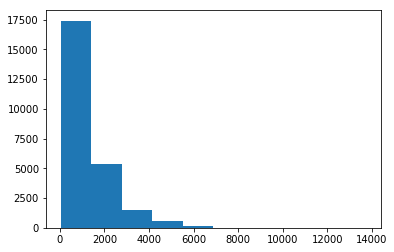

In [35]:
p = plt.hist(train_data.review_length.values)

In [36]:
s.value_counts()

0     9420
1     6921
2     4015
3     2174
4     1131
5      600
6      325
7      159
8       91
9       59
10      42
11      20
12      13
14       8
13       7
16       6
15       5
22       1
19       1
18       1
17       1
dtype: int64

In [37]:
train_data_expand = train_data.join(bow_expand_df)

In [38]:
train_data_expand.head()

,id,sentiment,review,review_length,awesome,good,amazing,interesting,terrible,bad,awful,boring
0,5814_8,1,With all this stuff going down at the moment w...,2302,0,0,0,0,0,3,0,1
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...",946,0,0,0,0,0,0,0,0
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,2449,0,0,0,0,0,0,0,1
3,3630_4,0,It must be assumed that those who praised this...,2245,0,1,0,0,0,0,0,0
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,2231,0,0,0,0,0,0,0,0


In [39]:
columns = df.columns[3:]
columns

Index(['review_length', 'awesome', 'terrible'], dtype='object')

In [40]:
X = np.asarray(df[columns])
X

array([[2302,    0,    0],
       [ 946,    0,    0],
       [2449,    0,    0],
       ...,
       [ 641,    0,    0],
       [1141,    0,    0],
       [ 942,    0,    0]], dtype=int64)

In [41]:
y = np.asarray(df.sentiment.transpose())

In [42]:
y

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

## 5) Model

In [43]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X, y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
nb.predict(np.asarray(df[columns]))

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
np.mean(nb.predict(np.asarray(df[columns])) == df.sentiment)

0.53612

# 6) Submission

In [46]:
test_data = pd.read_csv('testData.tsv', sep='\t')

In [47]:
test_data.head()

,id,review
0,12311_10,Naturally in a film who's main themes are of m...
1,8348_2,This movie is a disaster within a disaster fil...
2,5828_4,"All in all, this is a movie for kids. We saw i..."
3,7186_2,Afraid of the Dark left me with the impression...
4,12128_7,A very accurate depiction of small time mob li...


In [48]:
test_data['review_length'] = test_data.review.apply(len)

In [49]:
# Do the same feature extraction with the test data

from sklearn.feature_extraction.text import CountVectorizer
vocab_expand = ['awesome', 'good', 'amazing', 'interesting', 'terrible', 'bad', 'awful','boring']
expand_vectorizer = CountVectorizer(vocabulary=vocab_expand)
bow_expand = expand_vectorizer.fit_transform(test_data.review).todense()
words_expand = list(expand_vectorizer.vocabulary_.keys())
bow_expand_df = pd.DataFrame(bow_expand, index=test_data.index, columns = words_expand)
test_data_expand = test_data.join(bow_expand_df)
test_data_expand.to_csv('testDataFeatures.tsv', sep='\t')

In [50]:
predictions = nb.predict(np.asarray(test_data_expand[columns]))

In [51]:
submission = pd.DataFrame({"id": test_data.id, "sentiment": predictions})

In [52]:
submission.head()

,id,sentiment
0,12311_10,1
1,8348_2,1
2,5828_4,1
3,7186_2,1
4,12128_7,1


In [53]:
submission.to_csv('submission_kaggle.tsv', sep='\t')